# Bulldozers Project

**Column Descriptions**
	
* SalesID - unique identifier of a particular sale of a machine at auction	
* MachineID	- identifier for a particular machine;  machines may have multiple sales	
* ModelID - identifier for a unique machine model (i.e. fiModelDesc)	
* datasource -  source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.	
* auctioneerID - identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.	
* YearMade - year of manufacturer of the Machine	
* MachineHoursCurrentMeter - current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale	
* UsageBand	  value - (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.	
* Saledate - time of sale	
* Saleprice - cost of sale in USD	
* fiModelDesc - Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor	
* fiBaseModel - disaggregation of fiModelDesc	
* fiSecondaryDesc -  disaggregation of fiModelDesc	
* fiModelSeries - disaggregation of fiModelDesc	
* fiModelDescriptor - disaggregation of fiModelDesc	
* ProductSize - Don't know what this is 	The size class grouping for a product group. Subsets within product group. 
* ProductClassDesc - description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
* State - US State in which sale occurred	
* ProductGroup - identifier for top-level hierarchical grouping of fiModelDesc	
* ProductGroupDesc - description of top-level hierarchical grouping of fiModelDesc	
* Drive_System - machine configuration;  typcially describes whether 2 or 4 wheel drive	
* Enclosure - machine configuration - does machine have an enclosed cab or not	
* Forks - machine configuration - attachment used for lifting	
* Pad_Type - machine configuration - type of treads a crawler machine uses	
* Ride_Control - machine configuration - optional feature on loaders to make the ride smoother	
* Stick	machine - configuration - type of control 	
* Transmission - machine configuration - describes type of transmission;  typically automatic or manual	
* Turbocharged - machine configuration - engine naturally aspirated or turbocharged	
* Blade_Extension - machine configuration - extension of standard blade	
* Blade_Width  - machine configuration - width of blade	
* Enclosure_Type - machine configuration - does machine have an enclosed cab or not	
* Engine_Horsepower - machine configuration - engine horsepower rating	
* Hydraulics - machine configuration - type of hydraulics	
* Pushblock - machine configuration - option	
* Ripper - machine configuration - implement attached to machine to till soil	
* Scarifier - machine configuration - implement attached to machine to condition soil	
* Tip_control - machine configuration - type of blade control	
* Tire_Size - machine configuration - size of primary tires	
* Coupler - machine configuration - type of implement interface	
* Coupler_System - machine configuration - type of implement interface	
* Grouser_Tracks - machine configuration - describes ground contact interface	
* Hydraulics_Flow - machine configuration - normal or high flow hydraulic system	
* Track_Type - machine configuration - type of treads a crawler machine uses	
* Undercarriage_Pad_Width - machine configuration - width of crawler treads	
* Stick_Length - machine configuration - length of machine digging implement	
* Thumb - machine configuration - attachment used for grabbing	
* Pattern_Changer - machine configuration - can adjust the operator control configuration to suit the user	
* Grouser_Type - machine configuration - type of treads a crawler machine uses	
* Backhoe_Mounting - machine configuration - optional interface used to add a backhoe attachment	
* Blade_Type - machine configuration - describes type of blade	
* Travel_Controls - machine configuration - describes operator control configuration	
* Differential_Type - machine configuration - differential type, typically locking or standard	
* Steering_Controls - machine configuration - describes operator control configuration	

**Some Information about Train , Validate and Test Set**

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### Importing Modeles and Functions

In [1]:
# Importing Basic Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Magical Functions

%matplotlib inline

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importing the Bulldozer CSV File

In [2]:
bull=pd.read_csv("Bulldozer/TrainAndValid.csv",low_memory=False)
bull.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


### Details about Bulldozer CSV Files

In [3]:
# About this CSV File

bull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# About this CSV File

bull.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
# Finding Missing Values

bull.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

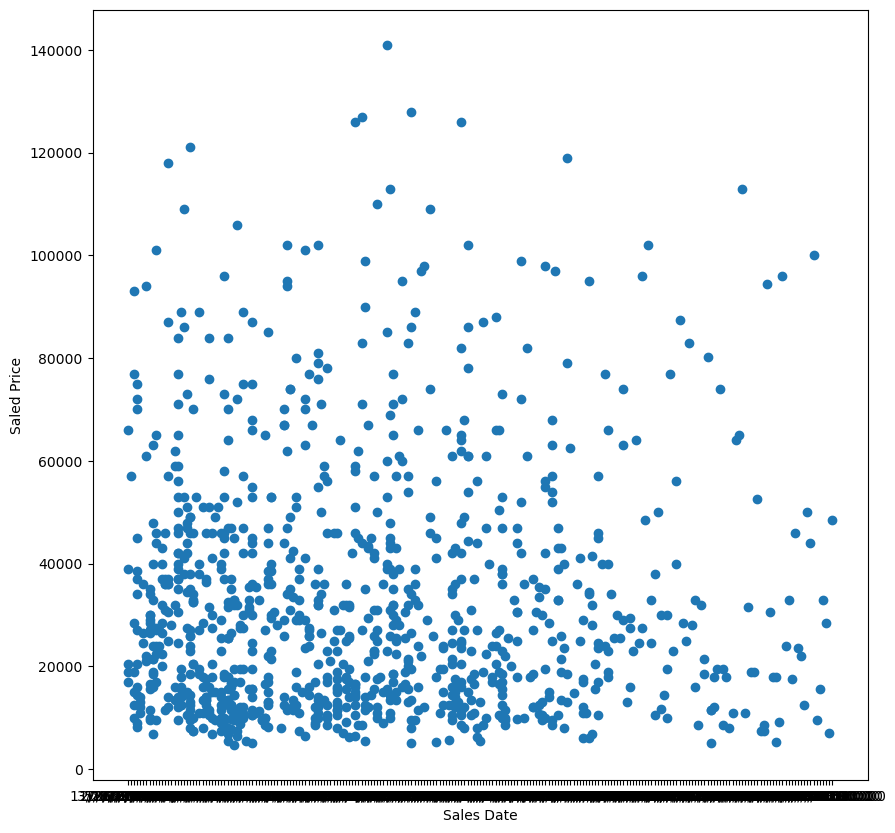

In [6]:
# Plotting Sales Date Vs Sales Price

fig , ax =plt.subplots(figsize=(10,10))
ax.scatter(bull["saledate"][:1000],bull["SalePrice"][:1000])
plt.xlabel("Sales Date");
plt.ylabel("Saled Price");

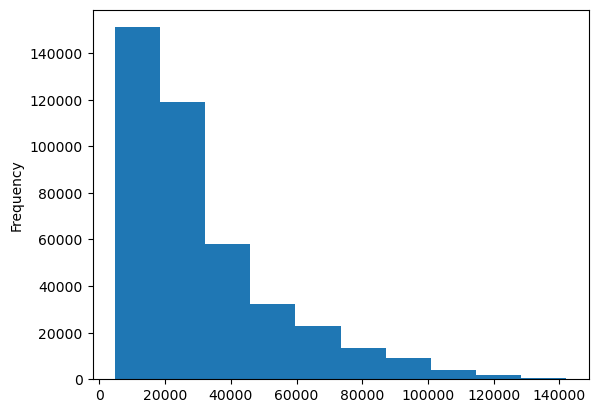

In [7]:
# Plottng Sales Price in Histogram

bull.SalePrice.plot.hist();

### Parsing Dates

In [8]:
# Converting the Datatype from String to DateTime for SalesDate

bull=pd.read_csv("Bulldozer/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])
bull.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [9]:
# Converted Datatype

bull["saledate"].dtype

dtype('<M8[ns]')

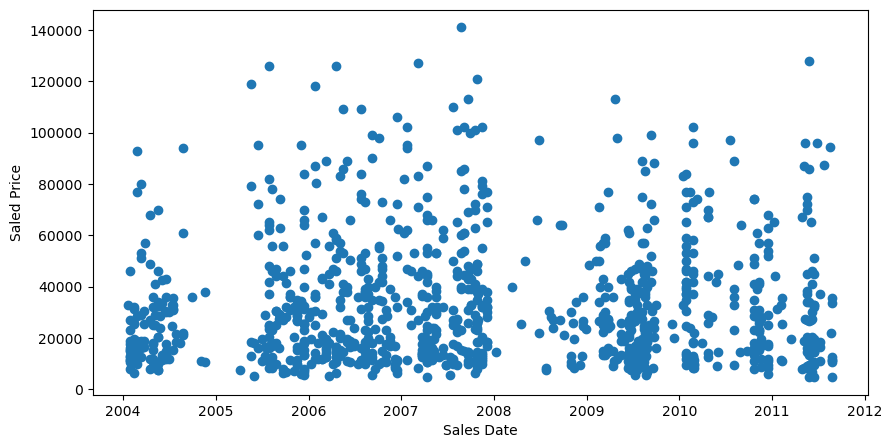

In [10]:
# Plotting Sales Date Vs Sales Price

fig , ax =plt.subplots(figsize=(10,5))
ax.scatter(bull["saledate"][:1000],bull["SalePrice"][:1000])
plt.xlabel("Sales Date");
plt.ylabel("Saled Price");

In [11]:
# Sorting the CSV File by Sales Date

bull.sort_values(by=["saledate"] , inplace=True , ascending=True)
bull.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Copying Dataset

In [12]:
# Creating a Copy Dataframe 

dozer=bull.copy()
dozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Creating Sales Day , Month , Year Attributes

In [13]:
# Creating Attributes

dozer["Sale Year"]=dozer.saledate.dt.year
dozer["Sale Month"]=dozer.saledate.dt.month
dozer["Sale Day"]=dozer.saledate.dt.day
dozer["Sale Day of Week"]=dozer.saledate.dt.day_of_week
dozer["Sale Day of Year"]=dozer.saledate.dt.day_of_year
dozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [14]:
# Droping SalesDate Column

dozer.drop("saledate" , axis=1 , inplace=True)
dozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Converting Data into Numerical

In [15]:
# About CSV File

dozer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [16]:
# Converting

for key,value in dozer.items():
    if(np.dtype(dozer[key])=='O'):
        dozer[key]=value.astype("category").cat.as_ordered()

In [17]:
dozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [18]:
# About CSV File

dozer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

### Filling Missing Values

#### 1.Numerical Values

In [19]:
# How Many Filling Values

dozer.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [20]:
# Filling Numerical Missing Values

for key,value in dozer.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            dozer[key]=value.fillna(value.median())  

In [21]:
dozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [22]:
# How Many Filling Values

dozer.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

#### 2.Categorical Values

In [23]:
# How Many Filling Values

dozer.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [24]:
dozer.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [25]:
dozer["fiProductClassDesc"].info()

<class 'pandas.core.series.Series'>
Index: 412698 entries, 205615 to 409203
Series name: fiProductClassDesc
Non-Null Count   Dtype   
--------------   -----   
412698 non-null  category
dtypes: category(1)
memory usage: 3.5 MB


In [26]:
# Filling Categorical Missing Values

for key,value in dozer.items():
    if not pd.api.types.is_numeric_dtype(value):
            dozer[key]=pd.Categorical(value).codes+1    

In [27]:
dozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1980.0,1978.0,1980.0,1984.0
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0.0,0.0,0.0,0.0,0.0
fiModelDesc,4593.0,1820.0,2348.0,1819.0,2119.0


In [28]:
dozer.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

### Modelling

#### Random Forest Regressor

In [29]:
%%time

# Getting our Data Ready
X=dozer.drop("SalePrice",axis=1)
y=dozer["SalePrice"]

# Importing Basic Models and Functions
from sklearn.ensemble import RandomForestRegressor
np.random.seed(30)
model=RandomForestRegressor(n_jobs=-1)

# Fitting our Data
model.fit(X , y)
model.score(X,y)

CPU times: total: 25min 47s
Wall time: 3min 50s


0.9876002641183818

#### Splitting our Data

In [30]:
# Splitting

train=dozer[dozer["Sale Year"]!=2012]
valid=dozer[dozer["Sale Year"]==2012]

# Split int X and y

X_train , y_train = train.drop("SalePrice",axis=1) , train["SalePrice"]
X_val , y_val = valid.drop("SalePrice",axis=1) , valid["SalePrice"]

#### Evaluation Function

In [31]:
from sklearn.metrics import root_mean_squared_log_error

def rmsle(y_test,y_pred):
    return root_mean_squared_log_error(y_test,y_pred)

def scores(model):
    train_pred=model.predict(X_train)
    valid_pred=model.predict(X_val)
    sco={"Train RMSLE" : rmsle(y_train,train_pred) , "Valid RMSLE" : rmsle(y_val,valid_pred)}
    return sco

In [32]:
%%time

# Fitting our Data
np.random.seed(30)
model=RandomForestRegressor(n_jobs=-1)

# Fitting our Data
model.fit(X_train , y_train)
model.score(X_val,y_val)

CPU times: total: 24min 22s
Wall time: 3min 31s


0.8727784489854271

In [33]:
scores(model)

{'Train RMSLE': 0.08421756496323714, 'Valid RMSLE': 0.25468516735154884}

### Reducing Data

In [34]:
%%time

# Fitting our Data
np.random.seed(30)
model_red=RandomForestRegressor(n_jobs=-1 , max_samples=10000)

# Fitting our Data
model_red.fit(X_train , y_train)
model_red.score(X_val,y_val)

CPU times: total: 52 s
Wall time: 8.42 s


0.8324186419452361

In [35]:
scores(model_red)

{'Train RMSLE': 0.25761309282774286, 'Valid RMSLE': 0.2931278285557005}

#### Randomized Search CV

In [36]:
# Impoting 
from sklearn.model_selection import RandomizedSearchCV

# Various Hyperparameters
hyp={
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_samples' : [10000]
     }

# Fitting our Data
models1=RandomForestRegressor(n_jobs=-1 , random_state=30)
rs_model=RandomizedSearchCV(models1 , param_distributions=hyp , n_iter=2 , cv=5 , verbose=3 ,)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END max_depth=30, max_features=log2, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.497 total time=  10.7s
[CV 2/5] END max_depth=30, max_features=log2, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.724 total time=   3.3s
[CV 3/5] END max_depth=30, max_features=log2, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.759 total time=   3.5s
[CV 4/5] END max_depth=30, max_features=log2, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.760 total time=   3.7s
[CV 5/5] END max_depth=30, max_features=log2, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.724 total time=   3.7s
[CV 1/5] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.507 total time=   7.7s
[CV 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=30),
                   n_iter=2,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [37]:
rs_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 20}

In [38]:
# Checking the Model Accuarcy with Best Hyperparamaters
model1=RandomForestRegressor(n_jobs=-1 , random_state=30 , n_estimators=300 , min_samples_split=5 , min_samples_leaf=1 , max_samples=10000 , max_features="sqrt" , max_depth=20)

# Fitting our Model
model1.fit(X_train,y_train)
model1.score(X_val,y_val)

0.7935637189266509

In [39]:
scores(model1)

{'Train RMSLE': 0.3048933581061027, 'Valid RMSLE': 0.3427329971948094}

In [52]:
# Make Ideal Model 

ideal_model=model

### Importing Test Data

In [53]:
# Getting our Test Data

X_test=pd.read_csv("Bulldozer/Test.csv",parse_dates=["saledate"])
X_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [54]:
# About this CSV File

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [55]:
# Missing Values

X_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [56]:
# Creating Attributes

X_test["Sale Year"]=X_test.saledate.dt.year
X_test["Sale Month"]=X_test.saledate.dt.month
X_test["Sale Day"]=X_test.saledate.dt.day
X_test["Sale Day of Week"]=X_test.saledate.dt.day_of_week
X_test["Sale Day of Year"]=X_test.saledate.dt.day_of_year
X_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [57]:
# Droping SalesDate Column

X_test.drop("saledate" , axis=1 , inplace=True)
X_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
fiModelDesc,580G,936,EC210BLC,330CL,650K
fiBaseModel,580,936,EC210,330,650


## Filling Missing Values

### 1. Numerical Values

In [58]:
# Filling Numerical Missing Values

for key,value in X_test.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            X_test[key]=value.fillna(value.median()) 

In [59]:
# Checking Missing Values

X_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                   10623
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type              11806
Engine_Horsepo

### 2. Categorical Values

In [60]:
# Filling Categorical Missing Values

for key,value in X_test.items():
    if not pd.api.types.is_numeric_dtype(value):
            X_test[key]=pd.Categorical(value).codes+1 

In [61]:
# Checking Missing Values

X_test.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [62]:
# Checking Equal Length or Not

len(X_test.columns) , len(X_val.columns) , len(X_train.columns)

(56, 56, 56)

## Make Predictions

In [63]:
y_pre=ideal_model.predict(X_test)
y_pre

array([21280. , 16982. , 47095. , ..., 12058.5, 17833. , 30205. ])

In [64]:
# Make as Expected Format

Bulldozer_Pre=pd.DataFrame({"Sales Id" :X_test.SalesID , "Sales Price" : y_pre})
Bulldozer_Pre.head()

,Sales Id,Sales Price
0,1227829,21280.0
1,1227844,16982.0
2,1227847,47095.0
3,1227848,87625.0
4,1227863,51800.0
